#Python Control Systems

**Table of Contents**
- Installation
- ODE Solver
- Laplace Transforms & Inverse Laplace Transforms 
  - Partial Fraction Expansion
- Modeling of Linear Systems
  - Transfer Function Models
  - State-space Models
  - Model Connections
- Linear System Response
  - Step Response
  - Impulse Response
  - Forced Response

## Installation

In [1]:
!pip install control

     |████████████████████████████████| 256kB 3.4MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=db8dacb543751b5af11920e9076c684a03b851315d865298a42edefda9551c78
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


## ODE Solver

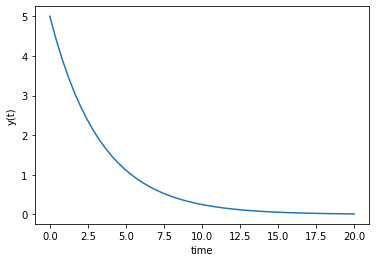

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()


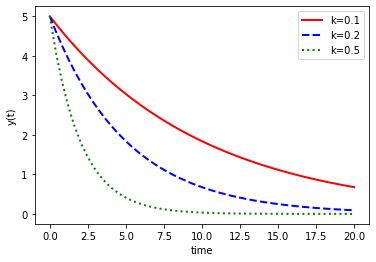

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

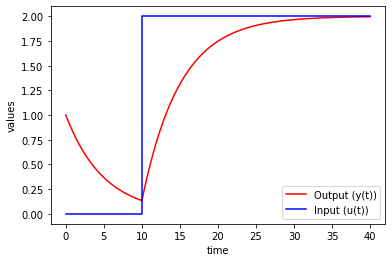

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    # u steps from 0 to 2 at t=10
    if t<10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

# initial condition
y0 = 1

# time points
t = np.linspace(0,40,1000)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y,'r-',label='Output (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

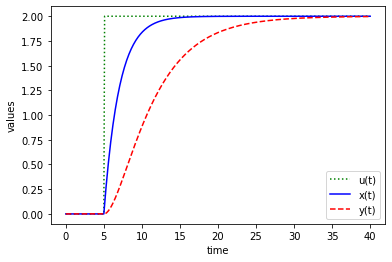

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

### Stable and Unstable Equilibrium Points
- System equation $\dot{x} = -x + x^2$

- $x_0 = 0$ is the stable equilibrium point and 
- $x_0=-1$ is an unstable equilibrium point.

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


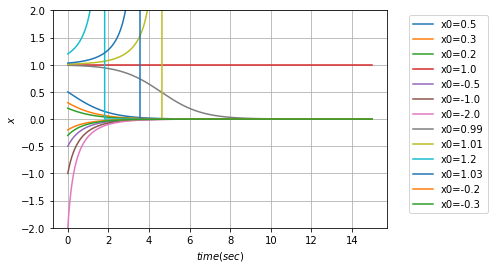

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(x,t):
  xdot = -x + x*x
  return xdot

# initial condition
x0 = [0.5, 0.3, 0.2, 1.0, -0.5, -1.0, -2.0, 0.99, 1.01, 1.2, 1.03, -0.2, -0.3]

# number of time points
n = 1000

fig = plt.figure()

# time points
t = np.linspace(0,15,n)

for i in range(len(x0)):
  x00 = x0[i]
  x = odeint(model, x00, t)
  plt.plot(t, x, '-', label='x0={}'.format(x0[i]))
  plt.ylim((-2,2))

plt.grid()
plt.xlabel('$time (sec)$')
plt.ylabel('$x$')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### Lorentz Attractor

State-space model

\begin{eqnarray}
\dot{x} &=& \sigma(y-x) \\
\dot{y} &=& (\rho - z)x - y \\
\dot{z} &=& xy - \beta z
\end{eqnarray}

where $\sigma = 10$, $\rho = 28$ and $\beta = 8/3$. 

Text(0.5, 0, 'Z')

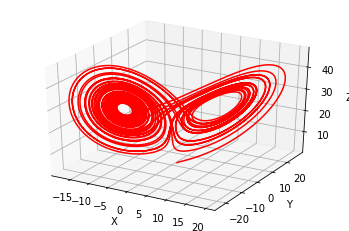

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(Z,t):
  sigma = 10.0
  rho = 28.0
  beta = 8.0/3.0
  x = Z[0]
  y = Z[1]
  z = Z[2]
  dxdt = sigma * (y - x)
  dydt = rho * x - y - x * z
  dzdt = x * y - beta * z
  dz = [dxdt, dydt, dzdt]
  return dz

# initial condition
z0 = [1, 1, 1]

# number of time points
n = 10000

# time points
t = np.linspace(0,40,n)
# solve ODE
Z = odeint(model, z0, t)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(Z[:,0], Z[:,1], Z[:,2], 'r-')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


### Vander-Pol Oscillator

\begin{eqnarray}

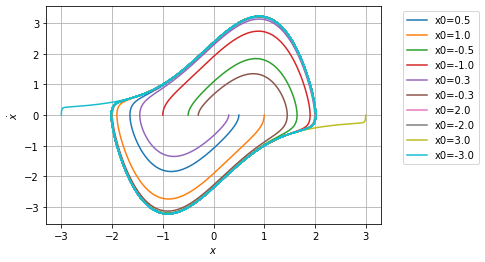

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
  mu = 1.5
  x = z[0]
  xdot = z[1]
  xddot = -x + mu * (1 - x*x)*xdot
  dz = [xdot, xddot]
  return dz

# initial condition
z00 = [0.5, 1.0, -0.5, -1.0, 0.3, -0.3, 2.0, -2.0, 3.0, -3.0]

# number of time points
n = 10000

fig = plt.figure()
# time points
t = np.linspace(0,40,n)

for i in range(len(z00)):
  z0 = [z00[i], 0]
  z = odeint(model, z0, t)
  plt.plot(z[:,0],z[:,1], label='x0={}'.format(z00[i]))

plt.grid()
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Laplace Transforms

In [1]:
import sympy as sym
from sympy.abc import s,t,x,y,z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform

# Laplace transform (t->s)
U = laplace_transform(5*t, t, s)
print('U')
print(U[0])
# Result: 5/s**2

# Inverse Laplace transform (s->t)
X = inverse_laplace_transform(U[0],s,t)
print('X')
print(X)
# Result: 5*t*Heaviside(t)

# Function
F = 5*(s+1)/(s+3)**2
print('F')
print(F)
# Result: (5*s + 5)/(s + 3)**2

# Partial fraction decomposition
G = sym.apart(F)
print('G')
print(G)
# Result: 5/(s + 3) - 10/(s + 3)**2

# denominator of transfer function
d1 = (s+1)*(s+3)*(s**2+3*s+1)

# expand polynomial
d2 = sym.expand(d1)
print('d2')
print(d2)
# Result: s**4 + 7*s**3 + 16*s**2 + 13*s + 3

# find roots
print(sym.roots(d2))
# Result: {-1: 1, -3: 1, -3/2 - sqrt(5)/2: 1, -3/2 + sqrt(5)/2: 1}

U
5/s**2
X
5*t*Heaviside(t)
F
(5*s + 5)/(s + 3)**2
G
5/(s + 3) - 10/(s + 3)**2
d2
s**4 + 7*s**3 + 16*s**2 + 13*s + 3
{-1: 1, -3: 1, -3/2 - sqrt(5)/2: 1, -3/2 + sqrt(5)/2: 1}


### Partial Fraction Expansion


In [5]:
import sympy as sym
from sympy.abc import s,t,x,y,z

f = 1/(s**2*(s**2+1))

print(f)

# PFE
sym.apart(f)


1/(s**2*(s**2 + 1))


-1/(s**2 + 1) + s**(-2)

In [6]:
import sympy as sym
from sympy.abc import s

F = (s+3)/((s+1)*(s+2))

# PFE
sym.apart(F)

-1/(s + 2) + 2/(s + 1)

In [17]:
import sympy as sym
from sympy.abc import s
import numpy as np

F = (s**2+2*s+3)/(s+1)**3

# PFE
print('PFE: ', sym.apart(F))

# method 2 - verification
var = sym.var('A:C')

p1 = A/(s+1)**3
p2 = B/(s+1)**2
p3 = C/(s+1)

h = p1 + p2 + p3
print(h)

h1 = sym.together(h)
print(h1)

f1 = sym.factor(h1, s)
print(f1)

e1 = sym.Eq(f1, F)
print(e1)

eq = sym.Eq(sym.numer(e1.lhs), sym.numer(e1.rhs))
print(eq)
coeff = sym.solve_undetermined_coeffs(eq, [A,B,C], s)
print(coeff)

h1.subs(coeff)
print(h1)

PFE:  1/(s + 1) + 2/(s + 1)**3
A/(s + 1)**3 + B/(s + 1)**2 + C/(s + 1)
(A + B*(s + 1) + C*(s + 1)**2)/(s + 1)**3
(A + B + C*s**2 + C + s*(B + 2*C))/(s + 1)**3
Eq((A + B + C*s**2 + C + s*(B + 2*C))/(s + 1)**3, (s**2 + 2*s + 3)/(s + 1)**3)
Eq(A + B + C*s**2 + C + s*(B + 2*C), s**2 + 2*s + 3)
{A: 2, B: 0, C: 1}
(A + B*(s + 1) + C*(s + 1)**2)/(s + 1)**3


## Linear System Models
- State Space Models
- Transfer Function Models
- Model Connections

In [25]:
from control import *
a = [[0,1],[-1,-1]]
b = [[0],[1]]
c = [1, 0]
d = 0
sys = ss(a,b,c,d)
print(sys)

g = tf(1, [1,1,1])
print(g)

# casting TF to SS
sys2 = ss(g)
print(sys2)

# casting SS to TF
g2 = tf(sys)
print(g2)

A = [[ 0.  1.]
 [-1. -1.]]

B = [[0.]
 [1.]]

C = [[1. 0.]]

D = [[0.]]


     1
-----------
s^2 + s + 1

A = [[-1. -1.]
 [ 1.  0.]]

B = [[1.]
 [0.]]

C = [[0. 1.]]

D = [[0.]]


     1
-----------
s^2 + s + 1



### Model Interconnections
- Series
- Parallel
- Feedback

In [26]:
from control import *

g1 = tf(1,[1,1])
g2 = tf(1, [1,2])

# Parallel connection
g3 = parallel(g1,g2)
print(g3)

# series connection
g4 = series(g1,g2)
print(g4)

# Feedback connection
g5 = feedback(g1,g2,-1) 
print(g5)


   2 s + 3
-------------
s^2 + 3 s + 2


      1
-------------
s^2 + 3 s + 2


    s + 2
-------------
s^2 + 3 s + 3



## Response of Linear Systems
- Step Response
- Impulse Response
- Forced Response
- Initial Condition Response

### Step response



     1
-----------
s^2 + s + 1



Text(0, 0.5, 'y')

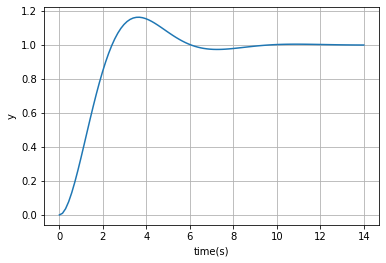

In [36]:
from control import *
import matplotlib.pyplot as plt

g = tf(1, [1,1,1])
print(g)

# step response
t,y = step_response(g)

plt.plot(t,y)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('y')


### Impulse Response

Text(0, 0.5, 'y')

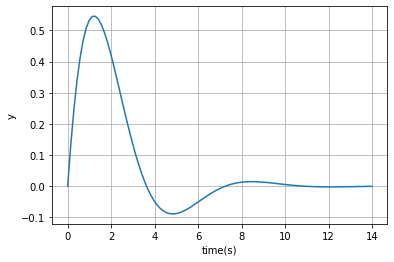

In [28]:
from control import *
import matplotlib.pyplot as plt

g = tf(1, [1,1,1])

t,y = impulse_response(g)

plt.plot(t,y)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('y')

Text(0, 0.5, 'y')

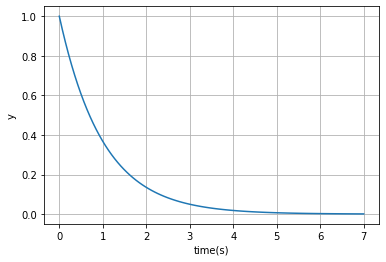

In [37]:
from control import *
import matplotlib.pyplot as plt

g = tf(1, [1,1])
t,y = impulse_response(g)

plt.plot(t,y)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('y')

### Initial Response

Text(0, 0.5, 'y')

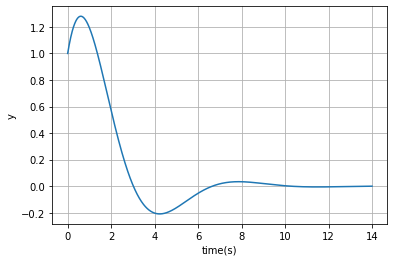

In [30]:
from control import *
a = [[0,1],[-1,-1]]
b = [[0],[1]]
c = [1, 0]
d = 0
sys = ss(a,b,c,d)

t,y = initial_response(sys, X0=[1,1])

plt.plot(t,y)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('y')

### Forced Response

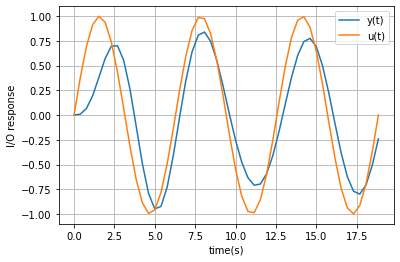

In [35]:
from control import *
from math import pi
import numpy as np

g = tf([1,2],[1,2,3,4])
t = np.linspace(0, 6*pi)
u = np.sin(t)

t,y,x = forced_response(g,t,u)

plt.plot(t,y,label='y(t)')
plt.plot(t,u,label='u(t)')
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('I/O response')
plt.legend(loc='best')

### Ramp Response


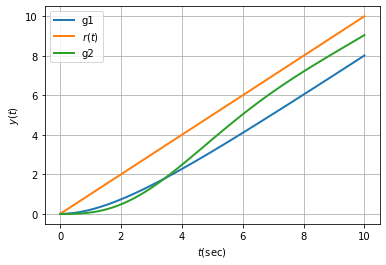

In [17]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

g1 = tf(1, [2,1]) # first order system
g2 = tf(1, [2, 1, 1]) # second order system

t = np.linspace(0,10, 100)
u = t
t,y1,x1 = forced_response(g1,t,u)
t,y2,x2 = forced_response(g2,t,u)
plt.plot(t,y1, lw = 2, label='g1')
plt.plot(t,u, lw = 2, label='$r(t)$')
plt.plot(t,y2,lw = 2, label='g2')
plt.grid()
plt.xlabel('$t$(sec)')
plt.ylabel('$y(t)$')
plt.legend(loc='best')

## Second order system

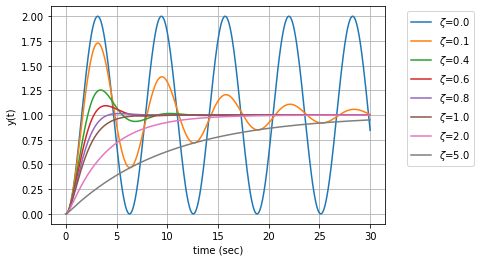

In [3]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

zeta = [0.0, 0.1, 0.4, 0.6, 0.8, 1.0, 2.0, 5.0]
wn = 1.0

t = np.linspace(0,30, 1000)

# plot response for each value of zeta
for i in range(len(zeta)):

  g = tf(wn*wn, [1, 2*zeta[i]*wn, wn*wn])
  t,y = step_response(g,t)
  plt.plot(t,y, label='$\zeta$={}'.format(zeta[i]))
  
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('y(t)')
plt.legend(bbox_to_anchor=(1.05,1))


### DC Motor Control
- Position feedback
- With Velocity feedback


   1
-------
s^2 + s


    1
---------
s^2 + 2 s


     1
-----------
s^2 + s + 1


      1
-------------
s^2 + 2 s + 1



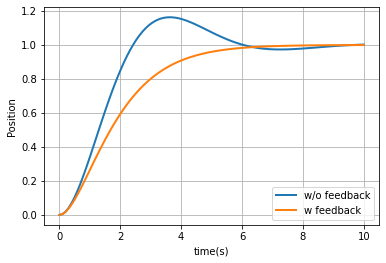

In [10]:
import control
import matplotlib.pyplot as plt
import numpy as np

K = 1.0
J = 1.0
B = 1.0
H = 1.0  # velocity feedback gain

# open-loop system
g1 = tf(K, [J, B, 0])
print(g1)

# open-loop system with velocity feedback
g2 = tf(K, [J, (B+K*H), 0])
print(g2)

# closed-loop system
gc1 = feedback(g1, 1, -1) 
print(gc1)
gc2 = feedback(g2, 1, -1)
print(gc2)

t = np.linspace(0, 10, 100)
t,y1 = step_response(gc1,t)
t,y2 = step_response(gc2,t)
plt.plot(t,y1, lw = 2, label='w/o feedback')
plt.plot(t,y2, lw = 2, label='w feedback')
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('Position')
plt.legend(loc='best')